In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMAResults
import os


In [5]:
# Load data function
def load_data(filepath):
    data = pd.read_csv(filepath, index_col='Date', parse_dates=True)
    data.index = pd.DatetimeIndex(data.index).to_period('D')
    return data

# Load the dataset
data = load_data(filepath="dataset/preprocessed_data.csv")


In [9]:
import os
import pickle

def load_models(directory):
    models = {}
    for filename in os.listdir(directory):
        if filename.endswith('.pkl'):
            try:
                base_name = filename.replace('_model.pkl', '')
                parts = base_name.split('_')
                if len(parts) < 2:
                    print(f"Skipping invalid model file: {filename}")
                    continue 
                category = parts[0]
                item = '_'.join(parts[1:])  
                
                if category not in models:
                    models[category] = {}
                path = os.path.join(directory, filename)
                with open(path, 'rb') as f:
                    models[category][item] = pickle.load(f)
            except Exception as e:
                print(f"Error processing file {filename}: {e}")
    return models

models = load_models('model/')



Skipping invalid model file: model.pkl


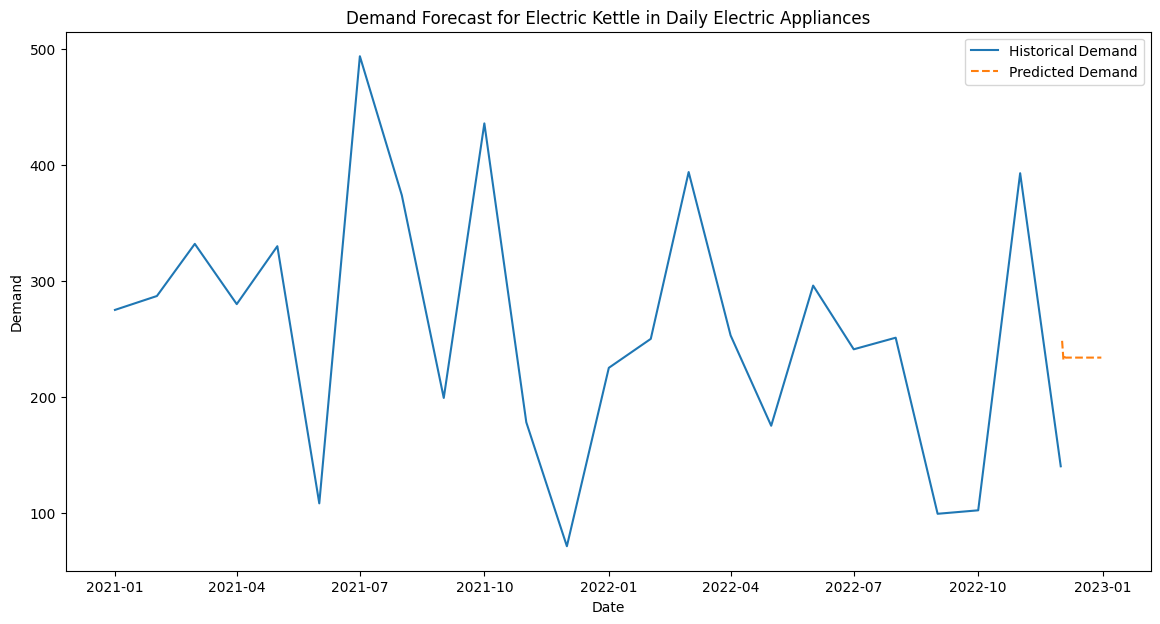

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_data_and_predictions(data, category, item, model, steps=30):
    fig, ax = plt.subplots(figsize=(14, 7))
    
    # Filter data for the specific category and item
    historical_data = data[(data['Category'] == category) & (data['Item'] == item)]
    
    # Convert PeriodIndex back to datetime for plotting
    historical_data.index = historical_data.index.to_timestamp()
    
    # Plot historical data
    ax.plot(historical_data.index, historical_data['Demand'], label='Historical Demand')
    
    # Generate and plot predictions
    predictions = model.forecast(steps=steps)
    prediction_dates = pd.period_range(start=historical_data.index[-1], periods=steps+1, freq='D').to_timestamp()[1:]
    ax.plot(prediction_dates, predictions, label='Predicted Demand', linestyle='--')

    ax.set_title(f'Demand Forecast for {item} in {category}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Demand')
    ax.legend()
    plt.show()

category, item = 'Daily Electric Appliances', 'Electric Kettle'
plot_data_and_predictions(data, category, item, models[category][item])

